In [1]:
import numpy as np
import pygrgl
import matplotlib.pyplot as plt

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals, normalize_genetic_values
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.noise_sim import sim_env_noise
from grg_pheno_sim.normalization import normalize
from grg_pheno_sim.split import split_phenotypes


The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct -p 10 -t 2 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory


In [4]:
rng = np.random.default_rng()

mean_1 = np.zeros(2)
cov_1 = np.eye(2) 
model_normal_multi = grg_causal_mutation_model("multivariate normal", mean=mean_1, cov=cov_1)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_normal_multi.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [[-1.20352264  0.23948975]
 [ 1.27174266 -0.74620519]
 [-1.46434558  0.25177634]
 ...
 [ 0.00500196  0.76228927]
 [-1.36975248  0.25229039]
 [-0.82368994  1.85518251]]


In [5]:
trait_df_normal_multi = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_normal_multi, random_seed=1)
sample_nodes_df_multi = additive_effect_sizes(grg_1, trait_df_normal_multi)
individuals = samples_to_individuals(sample_nodes_df_multi)
normalized_individual_multi_normal = normalize_genetic_values(individuals)


First, we will demonstrate how to simulate user-defined noise for multiple causal mutations (if the user does not want to use the h2 heritability feature). In this case, the user must specify the mean and covariance matrix to be used.

In [6]:
std_means = np.array([0, 0])
std_covariances = np.array([[1, 0], [0, 1]])
phenotypes_user_defined_multi_normal = sim_env_noise(individuals, user_defined=True, means=std_means, cov=std_covariances) #simulates noise from the multivariate standard normal distribution with means of zero and an identity matrix for covariance
phenotypes_user_defined_multi_normal_df = phenotypes_user_defined_multi_normal.phenotype_df
phenotypes_user_defined_multi_normal_df

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0     -37.942379            -1.107707   
1                     1              0     -23.087706             0.182788   
2                     0              1     -19.908226             0.443469   
3                     1              1     -22.240029            -0.847027   
4                     0              2      -9.933216            -1.240165   
..                  ...            ...            ...                  ...   
395                   1            197       6.632294             0.924280   
396                   0            198     -28.121344            -0.716447   
397                   1            198     -17.527029             0.350987   
398                   0            199     -10.601552            -0.242729   
399                   1            199     -13.724777             0.174079   

     phenotype  
0   -39.050086  
1   -22.904918  
2   -19.464757  
3   -23.087056  
4   -11.173382  
..         ...  
395   7.556575  
396 -28.837791  
397 -17.176042  
398 -10.844281  
399 -13.550698  

[400 rows x 5 columns]

The user can extract the h2 assigned to any phenotype simulation as follows.

In [7]:
user_defined_multi_h2 = phenotypes_user_defined_multi_normal.get_h2()
print(user_defined_multi_h2)

[1.00029479 0.9930305 ]


In [8]:
split_phenotypes(phenotypes_user_defined_multi_normal_df, return_print=True)

     causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0     -37.942379            -1.107707   
2                     0              1     -19.908226             0.443469   
4                     0              2      -9.933216            -1.240165   
6                     0              3     -16.476328             1.411799   
8                     0              4     -39.004838             2.612507   
..                  ...            ...            ...                  ...   
390                   0            195     -20.002154            -0.826351   
392                   0            196     -27.360933            -0.867529   
394                   0            197     -23.888838            -0.442651   
396                   0            198     -28.121344            -0.716447   
398                   0            199     -10.601552            -0.242729   

     phenotype  
0   -39.050086  
2   -19.464757  
4   -11.1733

In [9]:
split_phenotypes_list = split_phenotypes(phenotypes_user_defined_multi_normal_df, return_list=True)
split_phenotypes_list[0] #the first dataframe

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0     -37.942379            -1.107707   
2                     0              1     -19.908226             0.443469   
4                     0              2      -9.933216            -1.240165   
6                     0              3     -16.476328             1.411799   
8                     0              4     -39.004838             2.612507   
..                  ...            ...            ...                  ...   
390                   0            195     -20.002154            -0.826351   
392                   0            196     -27.360933            -0.867529   
394                   0            197     -23.888838            -0.442651   
396                   0            198     -28.121344            -0.716447   
398                   0            199     -10.601552            -0.242729   

     phenotype  
0   -39.050086  
2   -19.464757  
4   -11.173382  
6   -15.064529  
8   -36.392331  
..         ...  
390 -20.828505  
392 -28.228461  
394 -24.331489  
396 -28.837791  
398 -10.844281  

[200 rows x 5 columns]

In [10]:
split_phenotypes_list[1] #the second dataframe

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
1                     1              0     -23.087706             0.182788   
3                     1              1     -22.240029            -0.847027   
5                     1              2     -30.900956            -2.021770   
7                     1              3     -27.909054             0.200954   
9                     1              4      10.082859             1.252835   
..                  ...            ...            ...                  ...   
391                   1            195       0.216175            -0.197688   
393                   1            196     -26.683542            -1.398445   
395                   1            197       6.632294             0.924280   
397                   1            198     -17.527029             0.350987   
399                   1            199     -13.724777             0.174079   

     phenotype  
1   -22.904918  
3   -23.087056  
5   -32.922726  
7   -27.708100  
9    11.335694  
..         ...  
391   0.018487  
393 -28.081987  
395   7.556575  
397 -17.176042  
399 -13.550698  

[200 rows x 5 columns]

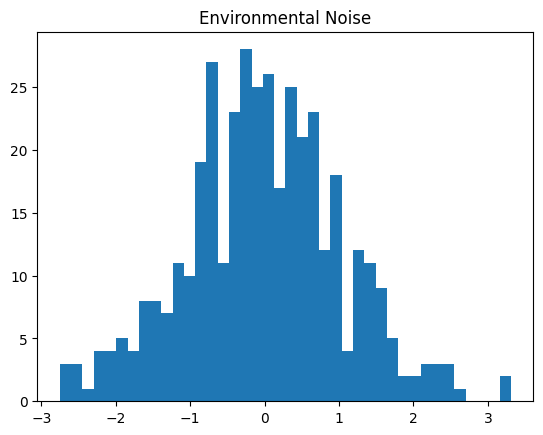

Mean of noise: -0.012409937367291228
Standard deviation of noise: 1.0535873405421528


In [11]:

plt.hist(phenotypes_user_defined_multi_normal_df["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotypes_user_defined_multi_normal_df['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotypes_user_defined_multi_normal_df['environmental_noise'].std()))

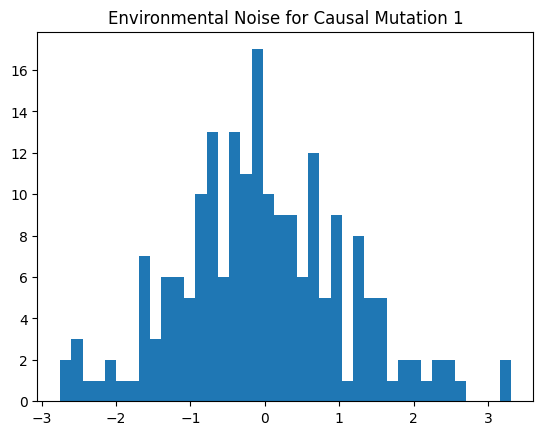

Mean of noise: -0.02792349428435597
Standard deviation of noise: 1.1336773208762438


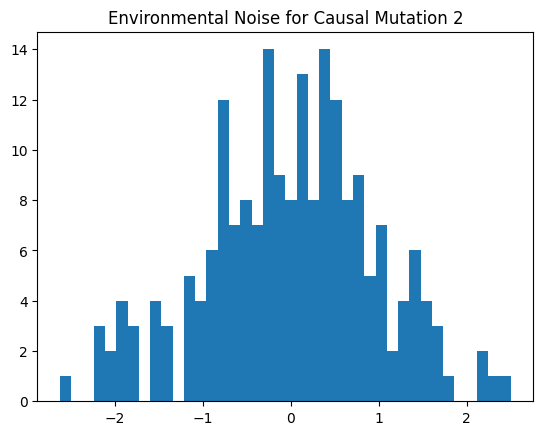

Mean of noise: 0.0031036195497735086
Standard deviation of noise: 0.969516716084993


In [12]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in phenotypes_user_defined_multi_normal_df.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [13]:
phenotypes_user_defined_multi_normal_df_normalized = normalize(phenotypes_user_defined_multi_normal)
phenotypes_user_defined_multi_normal_df_normalized

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0      -1.464479            -0.102448   
1                     1              0      -0.973510             0.015000   
2                     0              1       0.246567             0.044725   
3                     1              1      -0.902746            -0.070969   
4                     0              2       1.192977            -0.115015   
..                  ...            ...            ...                  ...   
395                   1            197       1.507512             0.076900   
396                   0            198      -0.532678            -0.065326   
397                   1            198      -0.509305             0.029041   
398                   0            199       1.129566            -0.020380   
399                   1            199      -0.191893             0.014273   

     phenotype  
0    -1.566927  
1    -0.958510  
2     0.291292  
3    -0.973714  
4     1.077961  
..         ...  
395   1.584412  
396  -0.598004  
397  -0.480264  
398   1.109186  
399  -0.177620  

[400 rows x 5 columns]

In [14]:
means = np.array([0, 0])
covariance = np.array([[1, 0.25], [0.25, 1]])
phenotypes_user_defined_multi_normal_special_cov = sim_env_noise(individuals, user_defined=True, means=means, cov=covariance) #simulating noise using a user-defined covariance matrix instead of the identity matrix
phenotypes_user_defined_multi_normal_special_cov_df = phenotypes_user_defined_multi_normal_special_cov.phenotype_df
phenotypes_user_defined_multi_normal_special_cov_df

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0     -37.942379            -0.861053   
1                     1              0     -23.087706             0.750811   
2                     0              1     -19.908226             0.650723   
3                     1              1     -22.240029             1.728042   
4                     0              2      -9.933216            -0.431347   
..                  ...            ...            ...                  ...   
395                   1            197       6.632294             1.694549   
396                   0            198     -28.121344            -0.441667   
397                   1            198     -17.527029             0.321617   
398                   0            199     -10.601552             0.464860   
399                   1            199     -13.724777             0.916183   

     phenotype  
0   -38.803432  
1   -22.336895  
2   -19.257503  
3   -20.511987  
4   -10.364563  
..         ...  
395   8.326844  
396 -28.563011  
397 -17.205412  
398 -10.136693  
399 -12.808593  

[400 rows x 5 columns]

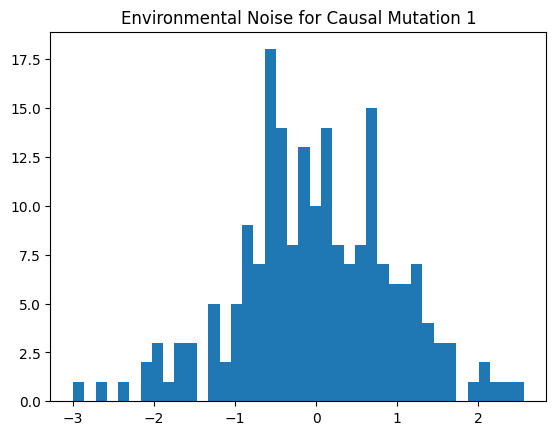

Mean of noise: -0.004253793854578991
Standard deviation of noise: 0.9700195530416899


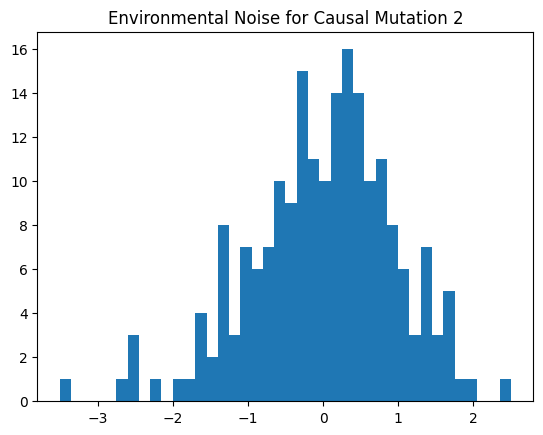

Mean of noise: 0.001499916756001589
Standard deviation of noise: 0.972750241331472


In [15]:
df_dict_test_cov = {k: v.sort_values('individual_id') for k, v in phenotypes_user_defined_multi_normal_special_cov_df.groupby('causal_mutation_id')}

num = len(df_dict_test_cov)

for i in range(num):
  temp_df = df_dict_test_cov[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [16]:
phenotypes_user_defined_multi_normal_special_cov_df_normalized = normalize(phenotypes_user_defined_multi_normal_special_cov, normalize_genetic_values=True)
phenotypes_user_defined_multi_normal_special_cov_df_normalized

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0      -1.463421            -0.081233   
1                     1              0      -0.981200             0.063047   
2                     0              1       0.246389             0.062098   
3                     1              1      -0.909877             0.145270   
4                     0              2       1.192114            -0.040493   
..                  ...            ...            ...                  ...   
395                   1            197       1.519422             0.142452   
396                   0            198      -0.532293            -0.041471   
397                   1            198      -0.513329             0.026934   
398                   0            199       1.128750             0.044476   
399                   1            199      -0.193409             0.076961   

     phenotype  
0    -1.544653  
1    -0.918154  
2     0.308487  
3    -0.764607  
4     1.151622  
..         ...  
395   1.661874  
396  -0.573764  
397  -0.486394  
398   1.173226  
399  -0.116448  

[400 rows x 5 columns]

In [17]:
phenotypes_zero_noise = sim_env_noise(individuals) #simulates zero noise (assumes h2 is an array of 1s)
phenotypes_zero_noise_df = phenotypes_zero_noise.phenotype_df
phenotypes_zero_noise_df

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0     -37.942379                  0.0   
1                     1              0     -23.087706                  0.0   
2                     0              1     -19.908226                  0.0   
3                     1              1     -22.240029                  0.0   
4                     0              2      -9.933216                  0.0   
..                  ...            ...            ...                  ...   
395                   1            197       6.632294                  0.0   
396                   0            198     -28.121344                  0.0   
397                   1            198     -17.527029                  0.0   
398                   0            199     -10.601552                  0.0   
399                   1            199     -13.724777                  0.0   

     phenotype  
0   -37.942379  
1   -23.087706  
2   -19.908226  
3   -22.240029  
4    -9.933216  
..         ...  
395   6.632294  
396 -28.121344  
397 -17.527029  
398 -10.601552  
399 -13.724777  

[400 rows x 5 columns]

Now, we show the usage of the narrow-sense heritability feature to simulate noise for multiple causal mutations (for a dataframe where genetic values have not yet been normalized).

In [18]:
phenotype_multi_normal_h2 = sim_env_noise(individuals, h2=[0.5, 0.75]) #simulating environmental noise for 2 causal mutations without normalizing genetic values
phenotype_multi_normal_h2_df = phenotype_multi_normal_h2.phenotype_df
phenotype_multi_normal_h2_df

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0     -37.942379           -12.365109   
1                     1              0     -23.087706            15.430866   
2                     0              1     -19.908226            10.895580   
3                     1              1     -22.240029            -4.333335   
4                     0              2      -9.933216             9.077246   
..                  ...            ...            ...                  ...   
395                   1            197       6.632294             6.125123   
396                   0            198     -28.121344             1.080543   
397                   1            198     -17.527029            13.073634   
398                   0            199     -10.601552             9.294103   
399                   1            199     -13.724777            -8.477738   

     phenotype  
0   -50.307489  
1    -7.656840  
2    -9.012646  
3   -26.573364  
4    -0.855970  
..         ...  
395  12.757418  
396 -27.040801  
397  -4.453395  
398  -1.307450  
399 -22.202514  

[400 rows x 5 columns]

In [19]:
print(phenotype_multi_normal_h2.get_h2()) #printing the h2 used for the simulation

[0.5, 0.75]


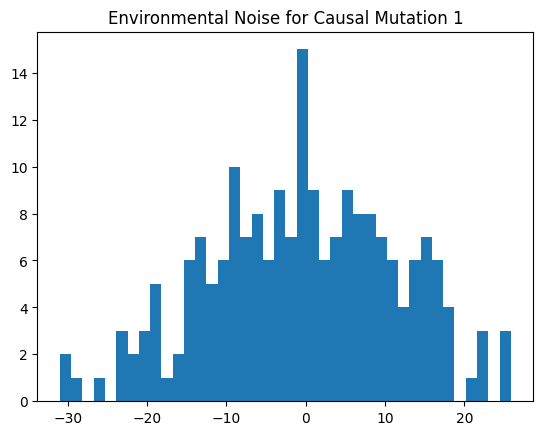

Mean of noise: -0.42871197859918597
Standard deviation of noise: 11.816134240356359


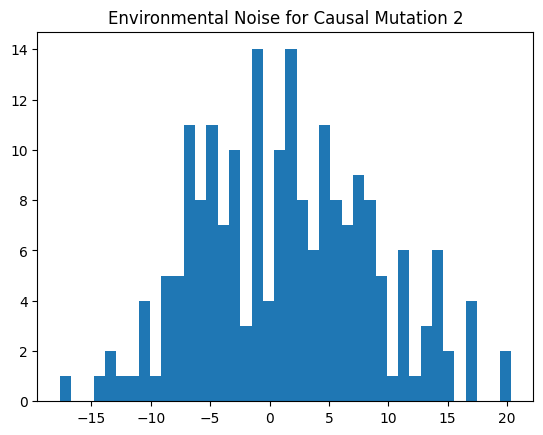

Mean of noise: 1.4609958746664211
Standard deviation of noise: 7.374312412598823


In [20]:
df_dict_test_pre_normal = {k: v.sort_values('individual_id') for k, v in phenotype_multi_normal_h2_df.groupby('causal_mutation_id')}

num = len(df_dict_test_pre_normal)

for i in range(num):
  temp_df = df_dict_test_pre_normal[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [21]:
phenotype_multi_normal_h2_df_normalized = normalize(phenotype_multi_normal_h2, normalize_genetic_values=True)
phenotype_multi_normal_h2_df_normalized

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0      -0.932302            -0.720962   
1                     1              0      -0.849909             1.018137   
2                     0              1       0.156967             0.683991   
3                     1              1      -0.788130            -0.422296   
4                     0              2       0.759461             0.574163   
..                  ...            ...            ...                  ...   
395                   1            197       1.316113             0.339926   
396                   0            198      -0.339108             0.091160   
397                   1            198      -0.444642             0.846340   
398                   0            199       0.719093             0.587261   
399                   1            199      -0.167530            -0.724344   

     phenotype  
0    -1.653264  
1     0.168228  
2     0.840958  
3    -1.210426  
4     1.333624  
..         ...  
395   1.656039  
396  -0.247949  
397   0.401698  
398   1.306354  
399  -0.891874  

[400 rows x 5 columns]

In [22]:
df_dict_test_pre_normal_final = {k: v.sort_values('individual_id') for k, v in phenotype_multi_normal_h2_df_normalized.groupby('causal_mutation_id')}

num = len(df_dict_test_pre_normal_final)

for i in range(num):
  temp_df = df_dict_test_pre_normal_final[i]
  print("Variance of the phenotypes for Causal Mutation " + str(i+1) + " is "  + str(temp_df['phenotype'].var()))
  print("Variance of the genetic values for Causal Mutation " + str(i+1) + " is "  + str(temp_df['genetic_value'].var()))
  print("Variance of the noise for Causal Mutation " + str(i+1) + " is "  + str(temp_df['environmental_noise'].var()))

Variance of the phenotypes for Causal Mutation 1 is 0.9999999999999997
Variance of the genetic values for Causal Mutation 1 is 0.40070306671823774
Variance of the noise for Causal Mutation 1 is 0.5093654736258278
Variance of the phenotypes for Causal Mutation 2 is 1.0
Variance of the genetic values for Causal Mutation 2 is 0.7518873140478411
Variance of the noise for Causal Mutation 2 is 0.28884915110433734


Now, we show the usage of the narrow-sense heritability feature to simulate noise for multiple causal mutations (for a dataframe where genetic values have already been normalized).

In [23]:
phenotype_post_normalization = sim_env_noise(normalized_individual_multi_normal, h2=[0.25, 0.45]) #simulating noise after genetic values have been normalized
phenotype_df_post_normalization = phenotype_post_normalization.phenotype_df
phenotype_df_post_normalization

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0      -1.472805             0.460469   
1                     1              0      -0.980158             1.691067   
2                     0              1       0.247969             2.462775   
3                     1              1      -0.908911             0.072495   
4                     0              2       1.199759            -2.771596   
..                  ...            ...            ...                  ...   
395                   1            197       1.517808            -0.230086   
396                   0            198      -0.535707            -0.877980   
397                   1            198      -0.512783             1.644249   
398                   0            199       1.135988             3.119494   
399                   1            199      -0.193204             1.753219   

     phenotype  
0    -1.012336  
1     0.710909  
2     2.710743  
3    -0.836416  
4    -1.571837  
..         ...  
395   1.287721  
396  -1.413686  
397   1.131466  
398   4.255482  
399   1.560015  

[400 rows x 5 columns]

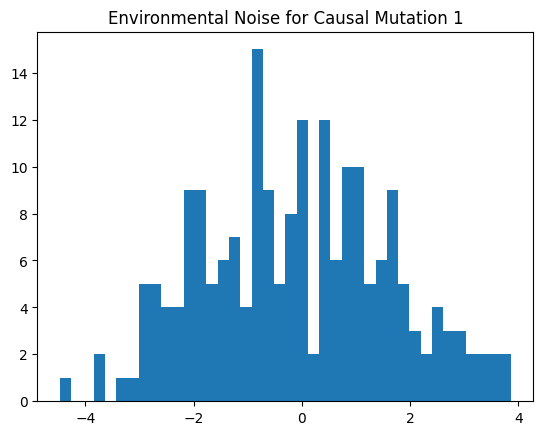

Mean of noise: -0.08638827563387103
Standard deviation of noise: 1.7323926187475045


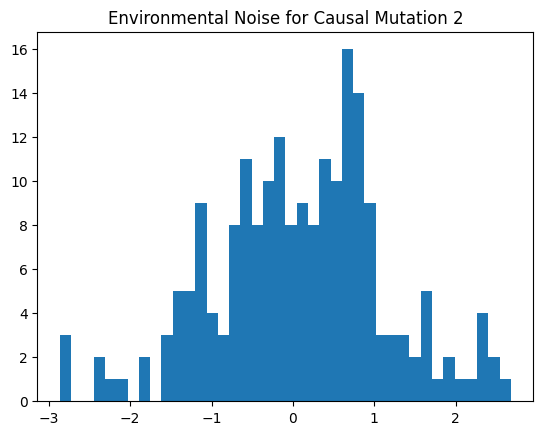

Mean of noise: 0.07708326151503032
Standard deviation of noise: 1.0610095404832423


In [24]:
df_dict_test_post_normal = {k: v.sort_values('individual_id') for k, v in phenotype_df_post_normalization.groupby('causal_mutation_id')}

num = len(df_dict_test_post_normal)

for i in range(num):
  temp_df = df_dict_test_post_normal[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [25]:
phenotype_post_normalization_final_df = normalize(phenotype_post_normalization) #normalizing the final dataframe with the phenotypes
phenotype_post_normalization_final_df

causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0      -0.805396             0.299046   
1                     1              0      -0.664077             1.093507   
2                     0              1       0.135600             1.393996   
3                     1              1      -0.615806            -0.003109   
4                     0              2       0.656082            -1.468392   
..                  ...            ...            ...                  ...   
395                   1            197       1.028346            -0.208114   
396                   0            198      -0.292948            -0.432878   
397                   1            198      -0.347421             1.061787   
398                   0            199       0.621209             1.753120   
399                   1            199      -0.130900             1.135616   

     phenotype  
0    -0.506350  
1     0.429430  
2     1.529597  
3    -0.618914  
4    -0.812310  
..         ...  
395   0.820232  
396  -0.725826  
397   0.714366  
398   2.374329  
399   1.004717  

[400 rows x 5 columns]

In [26]:
df_dict_test_post_normal_final = {k: v.sort_values('individual_id') for k, v in phenotype_post_normalization_final_df.groupby('causal_mutation_id')}

num = len(df_dict_test_post_normal_final)

for i in range(num):
  temp_df = df_dict_test_post_normal_final[i]
  print("Variance of the phenotypes for Causal Mutation " + str(i+1) + " is "  + str(temp_df['phenotype'].var()))
  print("Variance of the genetic values for Causal Mutation " + str(i+1) + " is "  + str(temp_df['genetic_value'].var()))
  print("Variance of the noise for Causal Mutation " + str(i+1) + " is "  + str(temp_df['environmental_noise'].var()))

Variance of the phenotypes for Causal Mutation 1 is 1.0
Variance of the genetic values for Causal Mutation 1 is 0.2990391932510366
Variance of the noise for Causal Mutation 1 is 0.8974716976269492
Variance of the phenotypes for Causal Mutation 2 is 1.0
Variance of the genetic values for Causal Mutation 2 is 0.45903398057020306
Variance of the noise for Causal Mutation 2 is 0.5167534847827817
